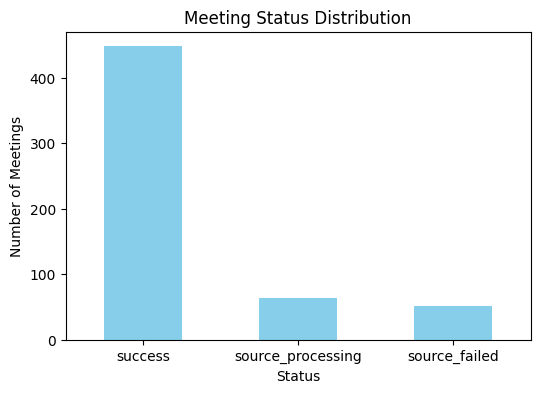

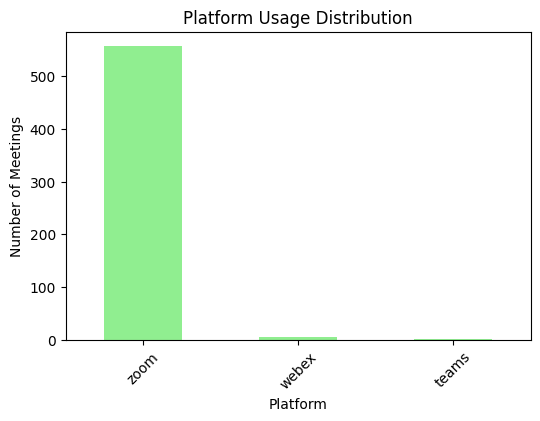

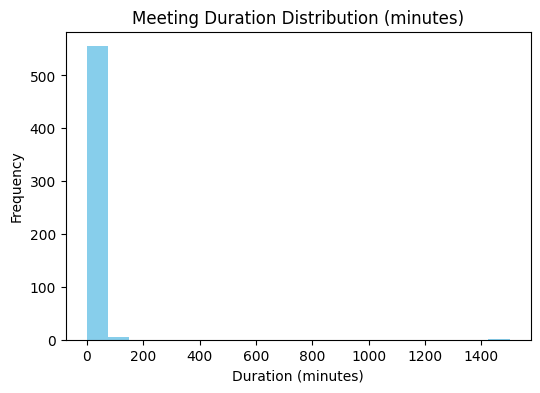

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# 데이터 로드
df = pd.read_csv('meeting_informations (1).csv')


# 1. Meeting status distribution (success/failure)
status_counts = df['status'].value_counts()

# 1. Meeting status distribution chart
plt.figure(figsize=(6, 4))
status_counts.plot(kind='bar', color='skyblue')
plt.title('Meeting Status Distribution')
plt.xlabel('Status')
plt.ylabel('Number of Meetings')
plt.xticks(rotation=0)
plt.show()

# 2. Platform usage distribution
platform_counts = df['platform'].value_counts()

# 2. Platform usage distribution chart
plt.figure(figsize=(6, 4))
platform_counts.plot(kind='bar', color='lightgreen')
plt.title('Platform Usage Distribution')
plt.xlabel('Platform')
plt.ylabel('Number of Meetings')
plt.xticks(rotation=45)
plt.show()

# 3. Meeting duration analysis
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['duration'] = (df['end_time'] - df['start_time']).dt.total_seconds() / 60  # Duration in minutes

# 3. Meeting duration distribution
plt.figure(figsize=(6, 4))
plt.hist(df['duration'], bins=20, color='skyblue')
plt.title('Meeting Duration Distribution (minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

# 4. Meeting list (sorted by start time)
df_sorted = df.sort_values('start_time')

# 4. Meeting list (using Plotly)
fig = px.scatter(df_sorted, x='start_time', y='meeting_name', color='status', title="Meeting List", labels={"start_time": "Meeting Start Time", "meeting_name": "Meeting Name"})
fig.show()


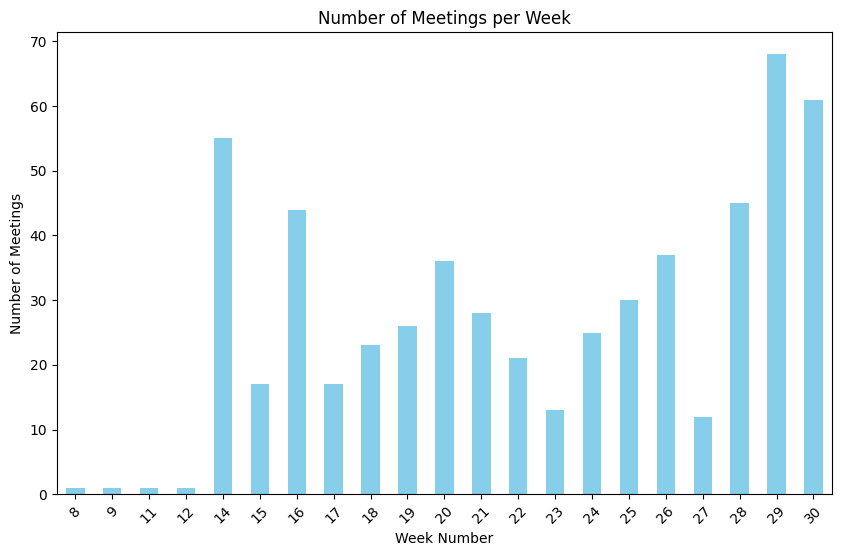

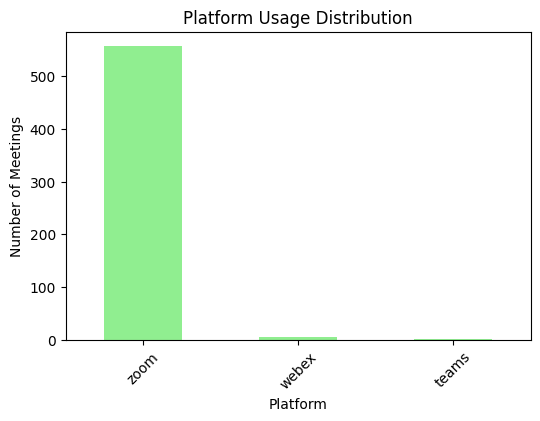

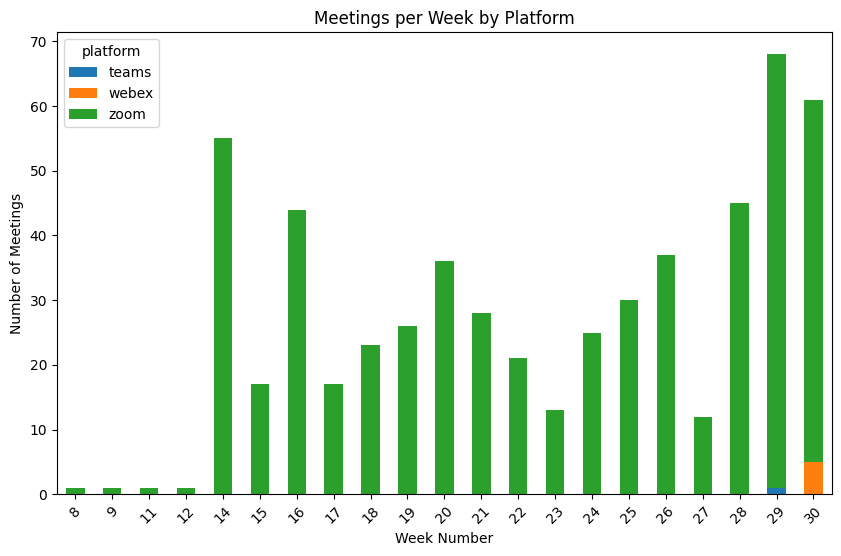

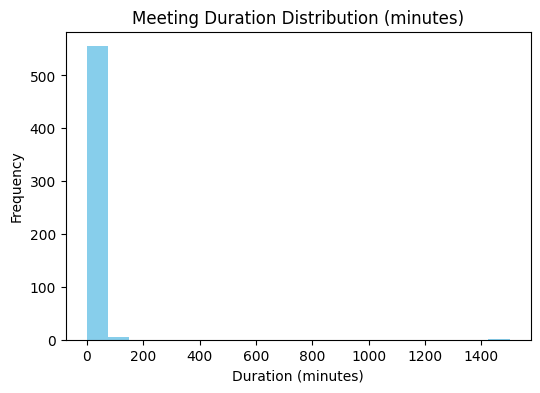

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


# Convert start_time to datetime
df['start_time'] = pd.to_datetime(df['start_time'])

# 1. Count meetings per week (week number)
df['week_number'] = df['start_time'].dt.isocalendar().week
meetings_per_week = df.groupby('week_number').size()

# 1. Meetings per week chart
plt.figure(figsize=(10, 6))
meetings_per_week.plot(kind='bar', color='skyblue')
plt.title('Number of Meetings per Week')
plt.xlabel('Week Number')
plt.ylabel('Number of Meetings')
plt.xticks(rotation=45)
plt.show()

# 2. Count meetings by platform
platform_counts = df['platform'].value_counts()

# 2. Platform usage distribution chart
plt.figure(figsize=(6, 4))
platform_counts.plot(kind='bar', color='lightgreen')
plt.title('Platform Usage Distribution')
plt.xlabel('Platform')
plt.ylabel('Number of Meetings')
plt.xticks(rotation=45)
plt.show()

# 3. Count meetings by week and platform
meetings_per_week_platform = df.groupby(['week_number', 'platform']).size().unstack().fillna(0)

# 3. Meetings per week by platform chart (stacked bar chart)
meetings_per_week_platform.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Meetings per Week by Platform')
plt.xlabel('Week Number')
plt.ylabel('Number of Meetings')
plt.xticks(rotation=45)
plt.show()

# 4. Meeting duration analysis
df['end_time'] = pd.to_datetime(df['end_time'])
df['duration'] = (df['end_time'] - df['start_time']).dt.total_seconds() / 60  # Duration in minutes

# 4. Meeting duration distribution
plt.figure(figsize=(6, 4))
plt.hist(df['duration'], bins=20, color='skyblue')
plt.title('Meeting Duration Distribution (minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

# 5. Meeting list (sorted by start time)
df_sorted = df.sort_values('start_time')

# 5. Meeting list (using Plotly)
fig = px.scatter(df_sorted, x='start_time', y='meeting_name', color='status', title="Meeting List", labels={"start_time": "Meeting Start Time", "meeting_name": "Meeting Name"})
fig.show()
